# Exercise 7, answers

## Problem 1

## Part a)

Let's assume that a solution $x^*$ is an optimal solution to the achievement scalarizing problem, but it is not Pareto optimal. 

If $x^*$ is not Pareto optimal, then there exists $x'\in S$ such that
$$
\left\{
\begin{align}
f_i(x')\leq f_i(x^*) \text{ for all }i=1,\ldots,k,\text{ and}\\
f_j(x')< f_j(x^*) \text{ for some }j=1,\ldots,k.
\end{align}
\right.
$$

Now,
$$
\max_{i=1}^k(f_i(x^*)-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x^*) \geq \max_{i=1}^k(f_i(x')-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x^*)\\
>  \max_{i=1}^k(f_i(x')-z^{ref}_i)+\rho\sum_{i=1}^kf_i(x')
$$
where we used just the first inequality first, and then we used the previous proof from weighting method.

This means again that if the solution $x^*$ is not Pareto optimal, then it cannot be an optimal solution to the achievement scalarizing function.

## Part b)

Assume a Pareto optimal $x^*$. Now, we choose $z^{ref} = f(x^*)$. Let's have any solutions $x\in S$. Then,
$$
\max_{i=1\ldots,k}(f_i(x)-z_i^{ref})+\rho\sum_{i=1}^kf_i(x) = \max_{i=1\ldots,k}(f_i(x)-f_i(x^*))\\
\geq 0,
$$
because $\rho=0$ and $x^*$ is Pareto optimal and, thus, at least one of the objectives needs to be greater or equal (if this was not the case, the solution $x^*$ would not be Pareto optimal).

But now,
$$
\max_{i=1\ldots,k}(f_i(x^*)-z_i^{ref})+\rho\sum_{i=1}^kf_i(x^*)= \max_{i=1\ldots,k}(f_i(x^*)-f_i(x^*))+\rho\sum_{i=1}^kf_i(x^*) \\
= 0
$$
trivially. This means that the Pareto optimal solution $x^*$ is an optimal solution to the achievement scalarizing problem. 

## Problem 4

In [21]:
# Using Pyomo, optimal solution is x*=(1,0,0)
# x3 not in the constraints and because x1 => 0, we have x3=0
# since x2**4 is always positive, x2=0
# from the constraint it follows that x1**3 => 1 and we get x1=1

from pyomo.environ import *

model = ConcreteModel()
#Three variables
model.x = Var([1,2,3])
#Objective function including powers and logarithm
model.OBJ = Objective(expr = log(model.x[1]**2+1)+model.x[2]**4
                      +model.x[1]*model.x[3]) #Objective function
model.constr = Constraint(expr = model.x[1]**3-model.x[2]**2>=1)
model.box1 = Constraint(expr = model.x[1]>=0)
model.box2 = Constraint(expr = model.x[3]>=0)

from pyomo.opt import SolverFactory #Import interfaces to solvers

opt = SolverFactory("baron") #Use baron
#opt = SolverFactory("ipopt") #Use ipopt

res = opt.solve(model, tee=True) #Solve the  problem and print the output

print("Optimal solutions is ")
model.x.display()
print("Objective value at the optimal solution is ")
model.OBJ.display()

 BARON version 19.12.7. Built: WIN-64 Sat Dec 7 15:08:51 EST 2019 

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 No BARON license file found in user PATH.  Continuing in demo mode.
 Model size is allowable within BARON demo size.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP/QP: ILOG CPLEX                                      
 For NLP: IPOPT, FILTERSD, FILTERSQP
 Doing local search
 Unable to find/load CPLEX library cplex12100.dll.
 Using CPLEX library cplex1290.dll.
 Preprocessing found feasible solution with value 0.693147180560     
 Problem solved during preprocessing
 Lower bound is 0.693146180560     

 Cleaning up

                   

In [4]:
#Another way by a using penalty function method for comparison
import numpy as np
def f_constrained(x):
    return np.log(x[0]**2+1)+x[1]**4+x[0]*x[2],[x[0]**3-x[1]**2-1,x[0],x[2]],[]

In [5]:
def alpha(x,f):
    (_,ieq,eq) = f(x)
    return sum([min([0,ieq_j])**2 for ieq_j in ieq])+sum([eq_k**2 for eq_k in eq])

In [6]:
def penalized_function(x,f,r):
    return f(x)[0] + r*alpha(x,f)

In [7]:
from scipy.optimize import minimize
r = 1
# add multiple random starting points
x_start = [-10,-3,-5]
x_old = np.array([float('inf')]*3)
x_new = x_start
while np.linalg.norm(x_new-x_old)>0.000001:
    res = minimize(lambda x:penalized_function(x,f_constrained,r),
               x_start,method='Nelder-Mead')
    x_old = x_new
    x_new = np.array(res.x)
    r = 2*r #r+1
print(x_new, r)
print(f_constrained(x_new))

[ 1.00003297e+00 -9.67861107e-03  1.27419273e-04] 268435456
(0.6933075877345735, [5.252524006182924e-06, 1.0000329749246948, 0.0001274192731967655], [])


**Analysis:** Optimal solution is $x^*=(1,0,0)$ because
* $x_3$ not in the constraints and because $x_1 \geq 0$, we have $x_3=0$
* since $x_2^4$ is always positive, $x_2=0$
* from the constraint it follows that $x_1^3 \geq 1$ and we get $x_1=1$

*Based on the results, we can say that Baron was able to find a correct optimal solution. Also, the penalty function method found the same solution.*


## Pyomo solution for the task 3 of exercise 6

In [12]:
# just the norm
def prob(x):
    return [(x[0]-1)**2+x[1]**2,x[0]**2+(x[1]-1)**2]

In [13]:
# just the norm
def prob2(x):
    return [np.sqrt((x[0]-1)**2+x[1]**2),np.sqrt(x[0]**2+(x[1]-1)**2)]

In [14]:
from pyomo.environ import *
from pyomo.opt import SolverFactory #Import interfaces to solvers

def weighting_method_pyomo(f,w):
    points = []
    for wi in w:
        model = ConcreteModel()
        model.x = Var([0,1])
        #weighted sum
        model.obj = Objective(expr = wi[0]*f(model.x)[0]+wi[1]*f(model.x)[1])
        opt = SolverFactory("ipopt") #Use ipopt
        #Combination of expression and function
        res=opt.solve(model) #Solve the problem
        points.append([model.x[0].value,model.x[1].value]) #We should check for optimality...
    return points

In [15]:
import numpy as np
w = np.random.random((500,2)) #500 random weights
repr = weighting_method_pyomo(prob,w)

**Plot the solutions in the objective space**

In [16]:
import matplotlib.pyplot as plt
def visualize_representation(func,repr):
    f_repr_ws = [prob(repri) for repri in repr]
    fig = plt.figure()
    plt.scatter([z[0] for z in f_repr_ws],[z[1] for z in f_repr_ws])
    return plt

<module 'matplotlib.pyplot' from 'C:\\Devel\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

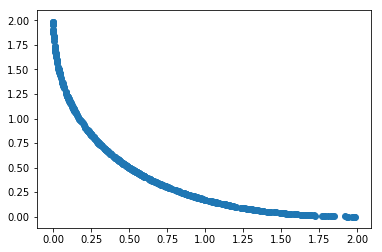

In [17]:
visualize_representation(prob2,repr)

**Plot the solutions in the decision space**

In [18]:
import matplotlib.pyplot as plt
def visualize_decisions(repr):
    fig = plt.figure()
    plt.scatter([x[0] for x in repr],[x[1] for x in repr])
    return plt

<class 'list'>


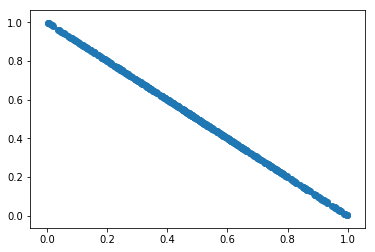

In [22]:
print(type(repr))
visualize_decisions(repr).show()